In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import time

In [3]:
np.random.seed(0)

In [4]:
def sample_data(S = 100):
    #generates S random pairs x, y where x is two dimensional and uniformly distributed between (0,1)
    #y is one-dimensional and uniformly distributed in {0,1}
    x = np.random.uniform(size = S*2).reshape(S,2)
    y = np.random.choice([0,1], size = S)
    return x, y 
    

In [5]:
X, y = sample_data() #generate a hypothesis h

In [6]:
def knn_helper(X_train, y_train, x_test, k):
    distances = np.linalg.norm(X_train - x_test, axis = 1)#finds euclidean distances between a point x_test and every training point

    nn_index = distances.argsort()[:k] #find index of k lowest distances 
    
    nn = y_train[nn_index] #find corresponding classes of nearest neighbours 

    pred = nn.mean() 
    
    if pred == 0.5:
        pred = np.random.choice([0,1]) #when result is undefined ie a tie, generate random prediction uniformally
    elif pred < 0.5:
        pred = 0
    else:
        pred = 1
    
    return pred

In [7]:
def K_NN(X_train, y_train, X_test, k ):
    #predicts class for X_test based on the mean of the k nearest neighbours in the X_train
    #feeds each test point x_test into knn_helper to get the prediction
    #returns array of predictions for whole test set
    y_hat = np.fromiter((knn_helper(X_train, y_train, x_test, k) for x_test in X_test), float)  
    return np.array(y_hat)

# 2.1.1 6)

In [8]:
def plot_visualisation(X, y, k = 3, grid = 0.01):
    
    #first get grid of points we want to predict in order to plot decision regions and boundaries
    x_grid , y_grid = np.meshgrid(np.arange(0, 1.1, grid), np.arange(0, 1.1, grid))
    
    X_test = np.c_[x_grid.ravel(), y_grid.ravel()] #format these test points
    Z = K_NN(X, y, X_test, k).reshape(x_grid.shape)# predict all points in the grid
    plt.pcolormesh(x_grid, y_grid, Z.reshape(x_grid.shape), cmap = 'winter', alpha = 0.5, shading = 'auto')
    plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Blues_r')
    plt.show()

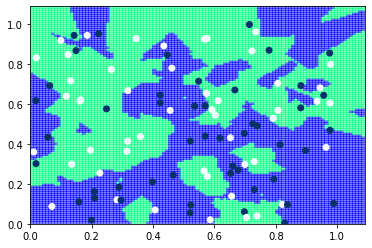

In [9]:
plot_visualisation(X, y, k = 3, grid = 0.01)

# 2.1.2 7 a)

In [10]:
def sample_ph(X_h , y_h ,n = 100, k = 3 ):
    #samples points from p_h, given h 
    
    X_ph = np.random.uniform(size = n*2).reshape(n, 2) # X values do not depend on h 
    coin_flip = np.random.binomial(n = 1, p = 0.8, size = n) #flip coin for the output of each y value
    y_ph = []
    #if coin is tails, give y value randomly from {0,1}
    #if coin is heads, y is given by hypothesis h
    for i in range(len(coin_flip)):
        if coin_flip[i] == 0:
            y_ph.append(np.random.choice([0,1]))
        else:
            y_ph.append(K_NN(X_h, y_h, X_ph[i].reshape(1,2), k).item()) #assign y h using k nearest neighbours in X_h and y_h
    
    return np.array(X_ph), np.array(y_ph)

In [11]:
#we define generalisation error as the number of misclassified test points divided by the size of the test set

In [12]:
#define some variables
est_generalisation_error = []
n_iter = 100
train_size = 4000
test_size = 1000

for k in range(1,50):
    error = 0
    for _ in range(n_iter): 
        X_h, y_h = sample_data(100) #sample hypothesis h with 100 points, then sample training and test sets
        X_train, y_train = sample_ph(X_h, y_h, train_size, 3) 
        X_test, y_test = sample_ph(X_h, y_h, test_size, 3)

        pred = K_NN(X_train, y_train, X_test, k) #predict test set
        error += 1 - (np.sum([a==b for a, b in zip(pred, y_test)]))/test_size #calculate error for this run

    est_generalisation_error.append(error/n_iter) #append mean error for this k over 100 runs


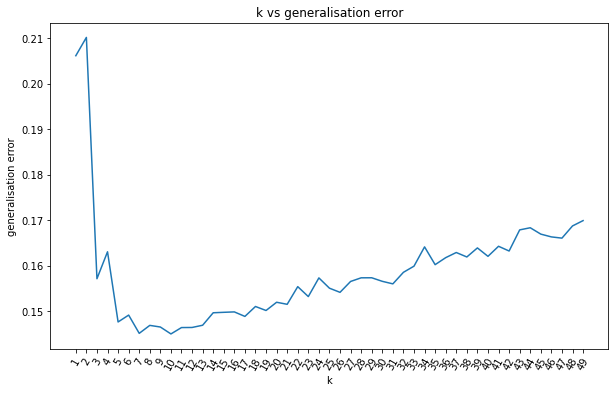

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(1,50), est_generalisation_error) #plot generalisation error
plt.xticks(np.arange(1,50))
ax.set_title('k vs generalisation error')
ax.set_xlabel('k')
ax.set_ylabel('generalisation error')
plt.xticks(rotation = '60')
plt.show()

# 2.1.3 8 a)

In [ ]:
optimal_k = []
n_iter =100
test_size = 1000
ms = [100]+[500*x for x in range(1,9)] #define different sample sizes m

for m in ms: #for each m find the k that minimises generalisation error (optimal k). 
    opt_k = []
    print(m)
    for _ in range(n_iter):
        est_generalisation_error2 = []
        for k in range(1,50): #for each k, sample a h, training and test set, choose k that minimises generalisation error
            error = 0
            #print(f'k = {k}')

            X_h, y_h = sample_data(100) #sample h 
            X_train, y_train = sample_ph(X_h, y_h, m, 3)
            X_test, y_test = sample_ph(X_h, y_h,test_size, 3)

            pred = K_NN(X_train, y_train, X_test, k)
            error += 1 - (np.sum([a==b for a, b in zip(pred, y_test)]))/test_size
            est_generalisation_error2.append(error)
        opt_k.append(np.array(est_generalisation_error2).argmin() + 1) #append the optimal k for this run to a list of optimal k's
    optimal_k.append(np.mean(opt_k)) #for this m, choose the mean of the optimal k's over 100 runs. 
        

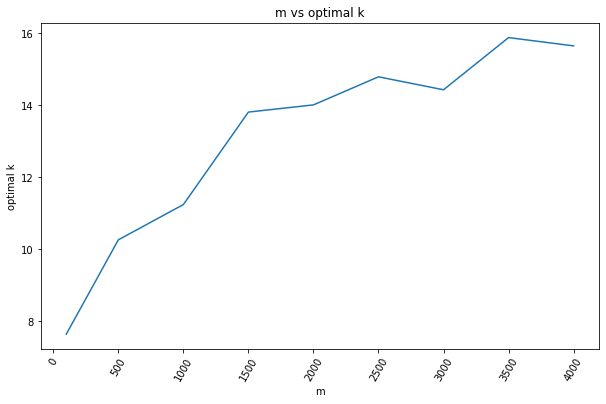

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(ms, optimal_k) #plot optimal k vs m
ax.set_title('m vs optimal k')
ax.set_xlabel('m')
ax.set_ylabel('optimal k')
plt.xticks(rotation = '60')
plt.show()